In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# with open('image_predictions.tsv', 'wb') as file:
   # file.write(requests.get(url).content)

In [3]:
df_pred  = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
import json
selected_cols = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        selected_cols.append({'tweet_id': data['id'],
                    'favorites': data['favorite_count'],
                    'retweets': data['retweet_count']})
basic_tweet = pd.DataFrame(selected_cols, columns=['tweet_id','favorites','retweets'])

In [8]:
basic_tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Completeness

###  tweet_df

In [9]:
print(df_tweet.shape)
df_tweet.isnull().sum() # some of the columns are almost compltely missing and are not useful
# the expanded_urls has only 59 missing values, maybe I can try to fix it

(2356, 17)


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df_tweet['expanded_urls']# take a look at this expanded_urls column

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [11]:
df_tweet.expanded_urls[0][-27:]

'/892420643555336193/photo/1'

In [12]:
df_tweet.tweet_id[0]
#The pattern seems to be https://twitter.com/dog_rates/status/ + tweet_id + /photo/1
# so I can fill in the missing value with this pattern

892420643555336193

In [13]:
# fill in the missing expanded_urls with https://twitter.com/dog_rates/status/ + tweet_id
def fill_in_urls(row):
    if pd.isnull(row['expanded_urls']):
        row['expanded_urls']= 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'
    else:
        row['expanded_urls']= row['expanded_urls']
    return row['expanded_urls']
    

df_tweet['expanded_urls']=df_tweet.apply(lambda row: fill_in_urls(row),axis=1)

In [14]:
df_tweet.expanded_urls[30], df_tweet.tweet_id[30]
# row30 was missing value, and now it has an url
# the number part of the url matches its id

('https://twitter.com/dog_rates/status/886267009285017600/photo/1',
 886267009285017600)

### df_pred

In [15]:
df_pred.isnull().sum()# no missing value

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### basic_tweet

In [16]:
basic_tweet.isnull().sum()# no missing value

tweet_id     0
favorites    0
retweets     0
dtype: int64

## Tidiness

### df_tweet

In [17]:
# doggo, floofer, pupper, puppo can be put into one column called dog_stage
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [18]:
df_tweet[(df_tweet.doggo=='None')&(df_tweet.floofer=='None')&(df_tweet.pupper=='None')&(df_tweet.puppo=='None')]
# in most of row, this dog stage is missing

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
# create a new column "dog_stage" and indicate which stage the dog is, including "doggo","floofer","pupper", or"puppo"
def dog_stage(row):
    if row['doggo']!='None':
        result=row['doggo']
    elif row['floofer']!='None':
        result=row['floofer']
    elif row['pupper']!='None':
        result=row['pupper']
    elif row['puppo']!='None':
        result=row['puppo']
    else:
        result="None"
    return result
df_tweet['dog_stage']=df_tweet.apply(lambda row:dog_stage(row),axis=1)

In [20]:
# the puppo column with non-None value does not equal to the new dog_stage column with the value "puppo"
(df_tweet[df_tweet.puppo!='None']['puppo']).equals(df_tweet[df_tweet.dog_stage=='puppo']['dog_stage'])

False

In [21]:
puppo=df_tweet[df_tweet.puppo!='None'].copy()
puppo.loc[puppo.dog_stage!='puppo']#Those two columns are not equal because of duplicated stages.
# row191 is both doggo and puppo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,doggo


In [22]:
# give it a new category called duplicated
df_tweet.loc[191,'dog_stage']='duplicated'

In [23]:
df_tweet.loc[191,'dog_stage']

'duplicated'

In [24]:
# the floofer column with non-None value does not equal to the new dog_stage column with the value "floofer"
(df_tweet[df_tweet.floofer!='None']['floofer']).equals(df_tweet[df_tweet.dog_stage=='floofer']['dog_stage'])

False

In [25]:
floofer=df_tweet[df_tweet.floofer!='None'].copy()
floofer.loc[floofer.dog_stage!='floofer']
# floofer has duplication too
# row200 is both doggo and floofer

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,doggo


In [26]:
# give it the same 'duplicated' value
df_tweet.loc[200,'dog_stage']='duplicated'

In [27]:
df_tweet.loc[200,'dog_stage']

'duplicated'

In [28]:
# the pupper column with non-None value does not equal to the new dog_stage column with the value "pupper"
(df_tweet[df_tweet.pupper!='None']['pupper']).equals(df_tweet[df_tweet.dog_stage=='pupper']['dog_stage'])

False

In [29]:
pupper=df_tweet[df_tweet.pupper!='None'].copy()
pupper_index=pupper.loc[pupper.dog_stage!='pupper'].index
df_tweet.loc[pupper_index,'dog_stage']='duplicated'
# pupper has many rows of duplication, I give them the value "duplicated" too since they are both pupper and doggo

In [30]:
# look fine when examined manually
df_tweet.loc[df_tweet.dog_stage=='duplicated']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,duplicated
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,duplicated
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,duplicated
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,duplicated
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,duplicated
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,duplicated
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,duplicated
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,duplicated
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,duplicated
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,duplicated


In [31]:
len(df_tweet.loc[df_tweet.dog_stage=='duplicated'])

14

In [32]:
# it should be False because doggo column should match "doggo" and "duplicated" in dog_stage column
(df_tweet[df_tweet.doggo!='None']['doggo']).equals(df_tweet[df_tweet.dog_stage=='doggo']['dog_stage'])

False

In [33]:
df_tweet.drop(columns=['doggo','floofer','puppo','pupper'],inplace=True)

In [34]:
# At first, df_tweet has 17 columns, I created a dog_stage column and drop 4 columns. The number of columns matches 17+1-4=14
df_tweet.shape

(2356, 14)

In [35]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### df_pred, df_tweet, basic_tweet

In [36]:
# the three tables can be one
df_pred.shape, df_tweet.shape, basic_tweet.shape
# de_pred has less rows than the other two

((2075, 12), (2356, 14), (2354, 3))

In [37]:
df = pd.merge(df_tweet, basic_tweet, on='tweet_id', how='outer')

In [38]:
df = pd.merge(df,df_pred, on='tweet_id',how='outer')

In [39]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
dog_stage                        0
favorites                        2
retweets                         2
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
dtype: int64

In [40]:
df[~df.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,1.0,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,1.0,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,1.0,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [41]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorites', 'retweets',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [42]:
# 'in_reply_to_status_id', 'in_reply_to_user_id' have many missing value and 
# they don't seem to be important in terms of analysis, so I'll get rid of them to make to dataframe
# looks cleaner
df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [43]:
df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Quality

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2356 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  dog_stage                   2356 non-null   object 
 12  favorites                   2354 non-null   float64
 13  retweets                    2354 

### data type

In [45]:
# tweet_id should be string
# tiemstamp should be timestamp
# dog_stage could be categorical
# favorites should be integer without decimal
# retweets should ne integer without decimal
# p1/p1_dog/p2/p2_dog/p3/p3_dog could be categorical
df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']]=df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']].astype('category')

In [46]:
df['tweet_id']=df['tweet_id'].astype(str)

In [47]:
df[['favorites','retweets']]=df[['favorites','retweets']].fillna(0.0).astype(int)

In [48]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [49]:
df.info()# re-check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2356 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        2356 non-null   object          

### 0 denominator

In [50]:
df.rating_denominator.value_counts()
# I don't understand how this rating system works, however a denominator of 0 doesn't make sense

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [51]:
df.iloc[np.where(df.rating_denominator==0)]
# the numerator is pretty extreme too, I guess it wanted to show something like an infinite rating, 
# however, if I want to analyze it based on math, it won't work. So I'll drop this ro

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835246439...,960,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.drop(index=np.where(df.rating_denominator==0)[0],inplace=True)

## retweet

In [53]:
# retweets are not wanted, so I'll remove them
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_user_id.isnull()].index)

True

In [54]:
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_timestamp.isnull()].index)
# it looks like rows with values in "retweeted_status_id","retweeted_status_user_id","df.retweeted_status_timestamp"
# represent retweet instead of original ones, so I'll drop them

True

In [55]:
retweet_index=df[~df.retweeted_status_id.isnull()].index

In [56]:
df.drop(index=retweet_index,inplace=True)

In [57]:
df.shape

(2174, 25)

In [58]:
df.retweeted_status_id.isnull().sum(),df.retweeted_status_user_id.isnull().sum(),df.retweeted_status_timestamp.isnull().sum()
# now that all variables in these three columns are NaN, I'll drop them all

(2174, 2174, 2174)

In [59]:
df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

### retweets start with "RT" in text column 

In [60]:
df[df.text.str.contains(pat='^RT.+')]['text']
# there are two rows with text columns start with RY, they are probably retweet, so remove them as well

1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
Name: text, dtype: object

In [61]:
RT_index=df[df.text.str.contains(pat='^RT.+')].index

In [62]:
df.drop(index=RT_index,inplace=True)

### name column

In [63]:
df.name.value_counts()

None       677
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Kial         1
Chubbs       1
Crumpet      1
Rufio        1
Nugget       1
Name: name, Length: 956, dtype: int64

In [64]:
df[df.name=='a'].iloc[0]['text']

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'

In [65]:
df[df.name=='a'].iloc[1]['text']
# it looks like rows with "a" in the name column is simply because names were not provided, I'll chage them to 'None'

'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq'

In [66]:
df['name']=df['name'].str.replace('^a','None')

In [67]:
df.name.value_counts()
#677+55=732, all the "a" have become None
#this column actually have some other "names" that do not look like names, but I am not planning to analyze dog names, 
# I'll just leave them as they are.

None       732
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Kial         1
Chubbs       1
Crumpet      1
Rufio        1
Nugget       1
Name: name, Length: 955, dtype: int64

### text column

In [68]:
# there are text and url in text column while I only want the text, so I'll remove the urls
df['text'] = df.text.str.rsplit(n=1, expand=True)[0]

In [69]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## source column

In [70]:
np.all(df.source)==np.any(df.source)

True

In [71]:
np.all(df.source)==df.source[1]
# it looks like all values in this column are the same, this column is useless in terms of analysis
# I'll drop it completely

True

In [72]:
df.drop(labels='source',axis=1, inplace=True)

### jpg url

In [73]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorites', 'retweets',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [74]:
df.loc[2355,'expanded_urls']

'https://twitter.com/dog_rates/status/666020888022790149/photo/1'

In [75]:
df.loc[2355,'jpg_url']
# expended_url direct to twitter site and jpg_url to a jpg photo, however, the two photos are basically the same.
# jpg_url is probably a backup for expanded_url that shows the twitter site with photo and text

'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'

In [76]:
df[~df.expanded_urls.str.contains(pat='https://twitter.com/')]
# some expanded_urls do not direct to twitter site

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
335,832645525019123713,2017-02-17 17:38:57+00:00,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,3195,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,819238181065359361,2017-01-11 17:42:57+00:00,Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,pupper,2550,462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,808344865868283904,2016-12-12 16:16:49+00:00,This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,47281,24069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,802600418706604034,2016-11-26 19:50:26+00:00,This is Bailey. She has mastered the head tilt...,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,7938,1714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,37818,21156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,2015-12-16 00:09:23+00:00,Super speedy pupper. Does not go gentle into t...,https://vine.co/v/imJ0BdZOJTw,10,10,None,pupper,3231,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,676593408224403456,2015-12-15 02:43:33+00:00,This pupper loves leaves. 11/10 for committed ...,https://vine.co/v/eEQQaPFbgOY,11,10,None,pupper,4954,2410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,676121918416756736,2015-12-13 19:30:01+00:00,Here we are witnessing a very excited dog. Cle...,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,2335,1297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,674307341513269249,2015-12-08 19:19:32+00:00,This is life-changing. 12/10,https://vine.co/v/i7nWzrenw5h,12,10,life,None,12129,7641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
urls=df[~df.expanded_urls.str.contains(pat='https://twitter.com/')][['expanded_urls','jpg_url']].copy()

In [78]:
urls.isnull().sum()
# in those rows with non-twitter expanded_urls, none of them has jpg_url.
# I can say that this column is coupled with twitter site with photo or NaN when expanded_urls are not twitter site
# I'll discard this column since it is a duplicate url column

expanded_urls     0
jpg_url          93
dtype: int64

In [79]:
df.drop(labels='jpg_url',axis=1, inplace=True)

### Duplicate

In [80]:
df[df.duplicated(subset='expanded_urls',keep=False)]
# these two posts referred to the same dog, I'll drop one of them.

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,37818,21156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,668587383441514497,2015-11-23 00:30:28+00:00,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,1760,1174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.drop(index=657,axis=0, inplace=True)

## Save the dataframe

In [82]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [95]:
rating = df.rating_numerator/df.rating_denominator
upper=rating.quantile(0.75)
lower=rating.quantile(0.25)
IQR=upper-lower
boundary=upper+1.5*IQR
boundary


1.5

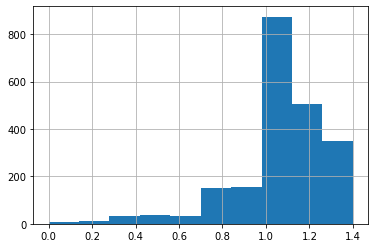

In [105]:
rating.iloc[np.where(rating<1.5)].hist();

1.3